# Praca domowa 4
## Karol Degórski

## Algorytm Support Vector Machine

## Import potrzebnych pakietów

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = None
pd.set_option('max_colwidth', None)

import dalex as dx

import random
random.seed(44)

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import seaborn as sns

## Wczytanie danych apartments i wine

### Apartments

Zbiór apartments pochodzi z pakietu dalex i dotyczny przewidywania ceny mieszkań za metr kwadratowy mieszkania, w zależności od podstawowych danych

In [2]:
apartments = dx.datasets.load_apartments()
apartments

,m2_price,construction_year,surface,floor,no_rooms,district
1,5897,1953,25,3,1,Srodmiescie
2,1818,1992,143,9,5,Bielany
3,3643,1937,56,1,2,Praga
4,3517,1995,93,7,3,Ochota
5,3013,1992,144,6,5,Mokotow
...,...,...,...,...,...,...
996,6355,1921,44,2,2,Srodmiescie
997,3422,1921,48,10,2,Bemowo
998,3098,1980,85,3,3,Bemowo
999,4192,1942,36,7,1,Zoliborz


In [3]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   m2_price           1000 non-null   int64 
 1   construction_year  1000 non-null   int64 
 2   surface            1000 non-null   int64 
 3   floor              1000 non-null   int64 
 4   no_rooms           1000 non-null   int64 
 5   district           1000 non-null   object
dtypes: int64(5), object(1)
memory usage: 54.7+ KB


Widzimy że zbiór ten ma wszystkie wartości liczbowe oprócz zmiennej district (jest ona typu object - nazwa dzielnicy). Zmienna celu m2_price też jest liczbowa\
Nie ma żadnych braków danych

### Wine

Zbiór Wine pochodzi ze strony https://www.apispreadsheets.com/datasets/117 i dotczy przewidywania typu wina w zależności od składu chemicznego

In [4]:
wine = pd.read_csv('wine_dataset.csv')
wine

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,One
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,One
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,One
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,One
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,Three
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,Three
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,Three
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,Three


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    float64
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    float64
 13  Wine 

Widzimy że zbiór ten ma wszystkie wartości liczbowe, oprócz zmiennej celu (jest ona typu object - nazwa kategorii).\
Nie ma żadnych braków danych

## Kodowanie zmiennej kategorycznej

W celu kodowania zmiennej kategorycznej, jaką jest district w zbiorze apartments użyję OneHotEncoding

In [6]:
import category_encoders as ce

In [7]:
oh = ce.OneHotEncoder()
enc_oh = oh.fit_transform(apartments['district'])
apartments = apartments.join(enc_oh)  
apartments = apartments.drop('district', axis = 1)
apartments

,m2_price,construction_year,surface,floor,no_rooms,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10
1,5897,1953,25,3,1,1,0,0,0,0,0,0,0,0,0
2,1818,1992,143,9,5,0,1,0,0,0,0,0,0,0,0
3,3643,1937,56,1,2,0,0,1,0,0,0,0,0,0,0
4,3517,1995,93,7,3,0,0,0,1,0,0,0,0,0,0
5,3013,1992,144,6,5,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,6355,1921,44,2,2,1,0,0,0,0,0,0,0,0,0
997,3422,1921,48,10,2,0,0,0,0,0,0,0,0,1,0
998,3098,1980,85,3,3,0,0,0,0,0,0,0,0,1,0
999,4192,1942,36,7,1,0,0,0,0,0,0,1,0,0,0


## Podział danych na zbiór treningowy i testowy

Zmienną celu w zbiorze danych apartments jest m2_price, określająca, cenę za metr kwadratowy mieszkania

In [8]:
X_apartments = apartments.drop('m2_price', axis = 1)
y_apartments = apartments.m2_price

Zmienną celu w zbiorze danych wine jest Wine Type określająca typ wina

In [9]:
X_wine = wine.drop('Wine Type', axis = 1)
y_wine = wine['Wine Type']

Dokonujemy podziału na zbiór testowy i treningowy (zbiór testowy będzie stanowił 30% całego zbioru)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_apartments_train, X_apartments_test, y_apartments_train, y_apartments_test = train_test_split(
    X_apartments, y_apartments, test_size=0.3, random_state=42)

In [12]:
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(
    X_wine, y_wine, test_size=0.3, random_state=42)

Importujemy również classification report

In [13]:
from sklearn.metrics import classification_report

Ponadto importuję RMSE, które będzie metryką dla oceny działania modelu dla zbioru apartments

In [14]:
from sklearn.metrics import mean_squared_error

## SVM

In [15]:
from sklearn.svm import SVC
from sklearn.svm import SVR

In [16]:
svm = SVC(random_state=1)
svr = SVR()

### Apartments

In [17]:
svr.fit(X_apartments_train, y_apartments_train)
y_apartments_hat = svr.predict(X_apartments_test)
apartments_score = mean_squared_error(y_apartments_test, y_apartments_hat, squared = False)
print('RMSE: ', apartments_score)

RMSE:  921.4746771019635


Niestety model słabo przewiduje cenę mieszkania dla tego zbioru danych - RMSE 921,47

### Wine

In [18]:
svm.fit(X_wine_train, y_wine_train)
y_wine_hat = svm.predict(X_wine_test)
wine_score = svm.score(X_wine_test, y_wine_test)
print('accuracy: ', wine_score)

accuracy:  0.7592592592592593


In [19]:
print(classification_report(y_wine_test, y_wine_hat))

              precision    recall  f1-score   support

         One       1.00      1.00      1.00        19
       Three       0.60      0.21      0.32        14
         Two       0.63      0.90      0.75        21

    accuracy                           0.76        54
   macro avg       0.74      0.71      0.69        54
weighted avg       0.75      0.76      0.72        54



W tym przypadku mamy już całkiem niezłe predykcje klas - accuracy 0,76

## SVM z przeskalowanymi danymi

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [21]:
svm_scaled = make_pipeline(StandardScaler(), SVC(random_state=1))
svr_scaled = make_pipeline(StandardScaler(), SVR())

### Apartments

In [22]:
svr_scaled.fit(X_apartments_train, y_apartments_train)
y_apartments_hat_scaled = svr_scaled.predict(X_apartments_test)
apartments_score_scaled = mean_squared_error(y_apartments_test, y_apartments_hat_scaled, squared = False)
print('RMSE: ', apartments_score_scaled)


RMSE:  901.248013638077


Widzimy, że po przeskalowaniu danych StandardScalerem wartość miara RMSE zmalała z 921,47, do 901.25. Model poprawił się

### Wine

In [23]:
svm_scaled.fit(X_wine_train, y_wine_train)
y_wine_hat_scaled = svm_scaled.predict(X_wine_test)
wine_score_scaled = svm_scaled.score(X_wine_test, y_wine_test)
print('accuracy: ', wine_score_scaled)

accuracy:  0.9814814814814815


In [24]:
print(classification_report(y_wine_test, y_wine_hat_scaled))

              precision    recall  f1-score   support

         One       1.00      1.00      1.00        19
       Three       1.00      0.93      0.96        14
         Two       0.95      1.00      0.98        21

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Również w tym przypadku możemy zauważyć, że miara accurancy wzrosła z 0.76, do 0.98.

### Podsumowanie skalowania

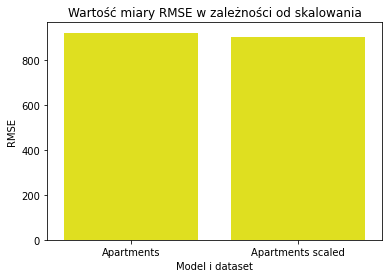

In [25]:
x1 = ['Apartments', 'Apartments scaled']
y1 = [apartments_score, apartments_score_scaled]

df1 = pd.DataFrame({'Model i dataset': x1,
                  'RMSE': y1})

fig, ax = plt.subplots()
sns.barplot(data = df1, x = 'Model i dataset', y = 'RMSE', dodge=False, color = 'yellow')
ax.set_title('Wartość miary RMSE w zależności od skalowania')
plt.show()

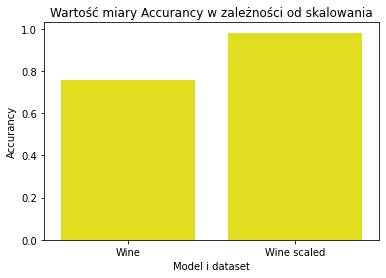

In [26]:
x2 = ['Wine', 'Wine scaled']
y2 = [wine_score, wine_score_scaled]
df2 = pd.DataFrame({'Model i dataset': x2,
                  'Accurancy': y2})

fig, ax = plt.subplots()
sns.barplot(data = df2, x = 'Model i dataset', y = 'Accurancy', dodge=False, color = 'yellow')
ax.set_title('Wartość miary Accurancy w zależności od skalowania')
plt.show()

Podsumowując po przeskalowaniu danych dla zbioru apartments poprawiła się wartość miary RMSE, natomiast dla zbioru Wine poprawiła się miara accurancy i inne miary zawarte w classification report, co oznacza że artykuł słusznie zaleca skalowanie danych do modelu SVM.

## Optymalizacja hiperparametrów

Hiperparametry będę optymalizował dla zbiorów przeskalowanych StandardScalerem

In [27]:
from sklearn.model_selection import RandomizedSearchCV

### Apartments

In [28]:
svm_scaled = make_pipeline(StandardScaler(), SVC(random_state=1))
svr_scaled = make_pipeline(StandardScaler(), SVR())

In [29]:
parameters = {
    'svr__C': [1e-6, 0.1,1, 10, 100],
    'svr__gamma': ['auto', 'scale', 1e-6, 1, 0.1 ,0.01 , 0.001],
    'svr__kernel': ['linear', 'sigmoid', 'rbf']
}

In [30]:
svr_apartments_rand = RandomizedSearchCV(estimator=svr_scaled, param_distributions=parameters, n_iter=30, scoring='neg_root_mean_squared_error')

In [31]:
svr_apartments_rand.fit(X_apartments_train, y_apartments_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   n_iter=30,
                   param_distributions={'svr__C': [1e-06, 0.1, 1, 10, 100],
                                        'svr__gamma': ['auto', 'scale', 1e-06,
                                                       1, 0.1, 0.01, 0.001],
                                        'svr__kernel': ['linear', 'sigmoid',
                                                        'rbf']},
                   scoring='neg_root_mean_squared_error')

In [32]:
pd.DataFrame(svr_apartments_rand.cv_results_)[['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head()

,params,mean_test_score
13,"{'svr__kernel': 'rbf', 'svr__gamma': 'auto', 'svr__C': 100}",-311.865649
7,"{'svr__kernel': 'rbf', 'svr__gamma': 'scale', 'svr__C': 100}",-311.865649
2,"{'svr__kernel': 'sigmoid', 'svr__gamma': 'scale', 'svr__C': 100}",-339.966003
3,"{'svr__kernel': 'linear', 'svr__gamma': 0.1, 'svr__C': 100}",-341.620372
5,"{'svr__kernel': 'linear', 'svr__gamma': 1, 'svr__C': 100}",-341.620372


Optymalny model dla powyższych kerneli

In [33]:
svr_apartments_optimized = make_pipeline(StandardScaler(), SVR(kernel='rbf', gamma='auto', C=100))
svr_apartments_optimized.fit(X_apartments_train, y_apartments_train)
y_apartments_hat = svr_apartments_optimized.predict(X_apartments_test)
apartments_score_optimized = mean_squared_error(y_apartments_test, y_apartments_hat, squared = False)
print('RMSE: ', apartments_score_optimized)

RMSE:  276.72224657261427


Dla kernel poly

In [34]:
svr_poly = make_pipeline(StandardScaler(), SVR(kernel='poly'))

In [35]:
parameters_poly = {
    'svr__C': [0.1,1, 10, 100],
    'svr__gamma': ['auto', 'scale', 1, 0.1 ,0.01 , 0.001],
    'svr__degree': [1, 2, 3, 4, 5, 6, 8]
    
}

In [36]:
svr_apartments_rand_poly = RandomizedSearchCV(svr_poly, parameters_poly, n_iter=15, scoring='neg_root_mean_squared_error', n_jobs = -1, random_state=1)
svr_apartments_rand_poly.fit(X_apartments_train, y_apartments_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR(kernel='poly'))]),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'svr__C': [0.1, 1, 10, 100],
                                        'svr__degree': [1, 2, 3, 4, 5, 6, 8],
                                        'svr__gamma': ['auto', 'scale', 1, 0.1,
                                                       0.01, 0.001]},
                   random_state=1, scoring='neg_root_mean_squared_error')

In [37]:
pd.DataFrame(svr_apartments_rand_poly.cv_results_)[['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head()

,params,mean_test_score
10,"{'svr__gamma': 0.1, 'svr__degree': 8, 'svr__C': 100}",-231.412222
9,"{'svr__gamma': 1, 'svr__degree': 3, 'svr__C': 0.1}",-332.988047
11,"{'svr__gamma': 0.1, 'svr__degree': 4, 'svr__C': 10}",-560.760846
13,"{'svr__gamma': 1, 'svr__degree': 8, 'svr__C': 10}",-563.038401
8,"{'svr__gamma': 'auto', 'svr__degree': 1, 'svr__C': 10}",-617.847941


In [38]:
svr_apartments_poly_optimized = make_pipeline(StandardScaler(), SVR(kernel='poly', gamma=0.1, degree=8, C=100))
svr_apartments_poly_optimized.fit(X_apartments_train, y_apartments_train)
y_apartments_hat = svr_apartments_poly_optimized.predict(X_apartments_test)
apartments_score_poly_optimized = mean_squared_error(y_apartments_test, y_apartments_hat, squared = False)
print('RMSE: ', apartments_score_poly_optimized)

RMSE:  213.50814137730077


Znaleziony model w drugim Random search'u jest lepszy od tego pierwszego, zatem wybieram drugi jako optymalny

In [39]:
apartments_score_optimized = apartments_score_poly_optimized

### Wine

In [40]:
svm_scaled = make_pipeline(StandardScaler(), SVC(random_state=1))

In [41]:
parameters = {
    'svc__C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'svc__gamma': ['auto', 'scale'],
    'svc__kernel': ['linear', 'sigmoid', 'rbf']
}

In [42]:
svm_wine_rand = RandomizedSearchCV(svm_scaled, parameters, n_iter=20, random_state=1)
svm_wine_rand.fit(X_wine_train, y_wine_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svc', SVC(random_state=1))]),
                   n_iter=20,
                   param_distributions={'svc__C': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'svc__gamma': ['auto', 'scale'],
                                        'svc__kernel': ['linear', 'sigmoid',
                                                        'rbf']},
                   random_state=1)

In [43]:
pd.DataFrame(svm_wine_rand.cv_results_)[['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head()

,params,mean_test_score
0,"{'svc__kernel': 'linear', 'svc__gamma': 'scale', 'svc__C': 7}",0.984
6,"{'svc__kernel': 'linear', 'svc__gamma': 'scale', 'svc__C': 6}",0.984
16,"{'svc__kernel': 'linear', 'svc__gamma': 'scale', 'svc__C': 4}",0.984
15,"{'svc__kernel': 'linear', 'svc__gamma': 'auto', 'svc__C': 7}",0.984
13,"{'svc__kernel': 'linear', 'svc__gamma': 'scale', 'svc__C': 1}",0.984


Optymalny model dla powyższych kerneli

In [44]:
svm_wine_optimized = svm_scaled = make_pipeline(StandardScaler(), SVC(random_state=1, kernel='linear', gamma='scale', C=7))
svm_wine_optimized.fit(X_wine_train, y_wine_train)
y_wine_hat = svm_wine_optimized.predict(X_wine_test)
wine_score_optimized = svm_wine_optimized.score(X_wine_test, y_wine_test)
print('accuracy: ', wine_score_optimized)

accuracy:  0.9814814814814815


In [45]:
print(classification_report(y_wine_test, y_wine_hat))

              precision    recall  f1-score   support

         One       1.00      1.00      1.00        19
       Three       0.93      1.00      0.97        14
         Two       1.00      0.95      0.98        21

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Dla kernel poly

In [46]:
svm_poly = make_pipeline(StandardScaler(), SVC(kernel='poly', random_state=1))

In [47]:
parameters_poly = {
    'svc__C': [1, 2, 3, 4, 5, 6, 7, 8],
    'svc__gamma': ['auto', 'scale'],
    'svc__degree': [1, 2, 3, 4, 5, 6, 8]
    
}

In [48]:
svm_wine_rand_poly = RandomizedSearchCV(svm_poly, parameters_poly, n_iter=15, n_jobs = -1, random_state=1)
svm_wine_rand_poly.fit(X_wine_train, y_wine_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svc',
                                              SVC(kernel='poly',
                                                  random_state=1))]),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'svc__C': [1, 2, 3, 4, 5, 6, 7, 8],
                                        'svc__degree': [1, 2, 3, 4, 5, 6, 8],
                                        'svc__gamma': ['auto', 'scale']},
                   random_state=1)

In [49]:
pd.DataFrame(svm_wine_rand_poly.cv_results_)[['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head()

,params,mean_test_score
2,"{'svc__gamma': 'auto', 'svc__degree': 1, 'svc__C': 5}",0.984000
6,"{'svc__gamma': 'scale', 'svc__degree': 1, 'svc__C': 8}",0.984000
5,"{'svc__gamma': 'scale', 'svc__degree': 3, 'svc__C': 8}",0.943333
12,"{'svc__gamma': 'auto', 'svc__degree': 2, 'svc__C': 1}",0.919000
1,"{'svc__gamma': 'auto', 'svc__degree': 2, 'svc__C': 4}",0.894667


In [50]:
svm_wine_poly_optimized = make_pipeline(StandardScaler(), SVC(kernel='poly', gamma='auto', degree=1, C=5, random_state=1))
svm_wine_poly_optimized.fit(X_wine_train, y_wine_train)
y_wine_hat = svm_wine_poly_optimized.predict(X_wine_test)
wine_score_poly_optimized = svm_wine_poly_optimized.score(X_wine_test, y_wine_test)
print('accuracy: ', wine_score_poly_optimized)

accuracy:  0.9814814814814815


In [51]:
print(classification_report(y_wine_test, y_wine_hat))

              precision    recall  f1-score   support

         One       1.00      1.00      1.00        19
       Three       0.93      1.00      0.97        14
         Two       1.00      0.95      0.98        21

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Znalezione modele mają takie same miary accuracy i inne miary, zatem jako optymalny mogę wybrać pierwszy z nich

In [52]:
wine_score_optimized = wine_score_optimized

## Podsumowanie po doborze hiperparametrów

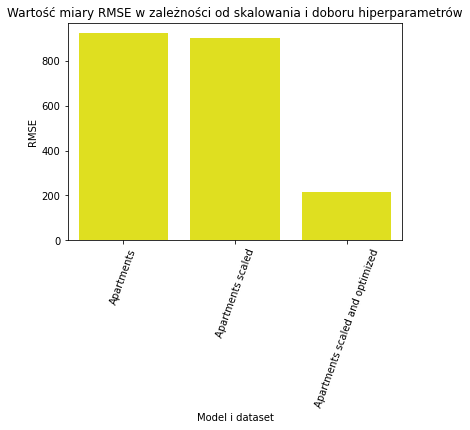

In [53]:
x1 = ['Apartments', 'Apartments scaled', 'Apartments scaled and optimized']
y1 = [apartments_score, apartments_score_scaled, apartments_score_optimized]

df1 = pd.DataFrame({'Model i dataset': x1,
                  'RMSE': y1})

fig, ax = plt.subplots()
sns.barplot(data = df1, x = 'Model i dataset', y = 'RMSE', dodge=False, color = 'yellow')
ax.set_title('Wartość miary RMSE w zależności od skalowania i doboru hiperparametrów')
plt.xticks(rotation=70)
plt.show()

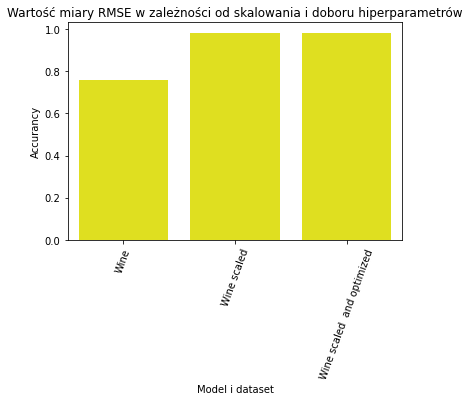

In [54]:
x2 = ['Wine', 'Wine scaled', 'Wine scaled  and optimized']
y2 = [wine_score, wine_score_scaled, wine_score_optimized]
df2 = pd.DataFrame({'Model i dataset': x2,
                  'Accurancy': y2})

fig, ax = plt.subplots()
sns.barplot(data = df2, x = 'Model i dataset', y = 'Accurancy', dodge=False, color = 'yellow')
ax.set_title('Wartość miary RMSE w zależności od skalowania i doboru hiperparametrów')
plt.xticks(rotation=70)
plt.show()

Jak widzimy wybór hiperparametrów znacząco przyczynił się do poprawienia predykcji dla zbioru apartments. Natomiast skalowanie danych przyczyniło się do dokładniejszych predykcji na obydwu zbiorach

# Zadanie bonusowe

## Wczytanie danych dotyczących transakcji w serwisie Allgero

In [55]:
allegro_df = pd.read_csv('allegro-api-transactions.csv')
allegro_df

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'Nośniki DVD-R/RW', '30-50 szt. DVD-R/RW']",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska', 'Majtki']",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Ściany i elewacje', 'Tapety', 'Fototapety']",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Zdrowie, pierwsza pomoc', 'Diety, zdrowy styl życia']",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', 'Galanteria papiernicza', 'Pozostałe']",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwarzacze CD i MD', 'Jednopłytowe', 'Marantz']",0,0,iwona7012,180.00,0,0,0,176,Kraśnik,RTV i AGD
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,0,34851,Dzierżoniów,Uroda
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kostiumy, maski', 'Akcesoria i gadżety']",1,1,pewex4all,5.99,1,470,0,983,Supraśl,"Odzież, Obuwie, Dodatki"
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery biegowe']",1,0,kostasia,200.00,0,0,0,163,Poznań,Dla Dzieci


In [56]:
allegro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

Nie mamy żadnych braków danych, a kolumny: main_category, categories i it_location, które mamy użyć w predykcji są typu object. \
Zmienna celu price jest typu liczbowego

In [57]:
allegro_df = allegro_df[['main_category', 'categories', 'it_location', 'price']]
allegro_df

,main_category,categories,it_location,price
0,Komputery,"['Komputery', 'Dyski i napędy', 'Nośniki', 'Nośniki DVD-R/RW', '30-50 szt. DVD-R/RW']",Warszawa,59.99
1,"Odzież, Obuwie, Dodatki","['Odzież, Obuwie, Dodatki', 'Bielizna damska', 'Majtki']",Warszawa,4.90
2,Dom i Ogród,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Ściany i elewacje', 'Tapety', 'Fototapety']",Leszno,109.90
3,Książki i Komiksy,"['Książki i Komiksy', 'Poradniki i albumy', 'Zdrowie, pierwsza pomoc', 'Diety, zdrowy styl życia']",Wola Krzysztoporska,18.50
4,"Odzież, Obuwie, Dodatki","['Odzież, Obuwie, Dodatki', 'Ślub i wesele', 'Galanteria papiernicza', 'Pozostałe']",BIAŁYSTOK,19.90
...,...,...,...,...
420015,RTV i AGD,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwarzacze CD i MD', 'Jednopłytowe', 'Marantz']",Kraśnik,180.00
420016,Uroda,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",Dzierżoniów,14.99
420017,"Odzież, Obuwie, Dodatki","['Odzież, Obuwie, Dodatki', 'Przebrania, kostiumy, maski', 'Akcesoria i gadżety']",Supraśl,5.99
420018,Dla Dzieci,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery biegowe']",Poznań,200.00


### Target Encoding

In [58]:
import category_encoders as ce

Za pomocą parametru smoothing  możemy zmieniać regularyzację. Jego wyższa wartość oznacza silniejszą regularyzację. Po przetestowaniu wybrałem wartość 0.01 dla parametru smoothing jako optymalną 

In [59]:
te_it = ce.TargetEncoder(smoothing=0.01)
te_cat = ce.TargetEncoder(smoothing=0.01)
te_mc = ce.TargetEncoder(smoothing=0.01)

enc_te_it = te_it.fit_transform(allegro_df['it_location'], allegro_df['price'])
allegro_df = allegro_df.drop(columns = 'it_location') 
allegro_df['it_location'] = enc_te_it

enc_te_cat = te_cat.fit_transform(allegro_df['categories'], allegro_df['price'])
allegro_df = allegro_df.drop(columns = 'categories') 
allegro_df['categories'] = enc_te_cat

enc_te_mc = te_mc.fit_transform(allegro_df['main_category'], allegro_df['price'])
allegro_df = allegro_df.drop(columns = 'main_category') 
allegro_df['main_category'] = enc_te_mc


allegro_df

,price,it_location,categories,main_category
0,59.99,85.423398,61.839091,121.810064
1,4.90,85.423398,12.375798,75.858049
2,109.90,61.990914,105.272597,72.434754
3,18.50,35.433365,24.072564,25.027497
4,19.90,117.191956,17.102344,75.858049
...,...,...,...,...
420015,180.00,24.306929,76.811350,107.534272
420016,14.99,66.785334,23.312063,28.128577
420017,5.99,18.682800,9.630092,75.858049
420018,200.00,106.203076,134.824626,71.206386


## Podział na zbiór treningowy i testowy

In [60]:
X_allegro = allegro_df.drop('price', axis = 1)
y_allegro = allegro_df[['price']]

Dzielimy zbiór danych na treningowy i testowy (zbiór testowy będzie stanowił 10% całości)

In [61]:
X_allegro_train, X_allegro_test, y_allegro_train, y_allegro_test = train_test_split(
    X_allegro, y_allegro, test_size=0.1, random_state=42)

## Wybór metryki

W naszym zadaniu zastosujemy miarę RMSE, czyli pierwiastek z błędu średniokwadratowego oraz miarę R2, czyli współczynnik determinacji

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Regresja liniowa

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr = LinearRegression()

In [65]:
lr.fit(X_allegro_train, y_allegro_train)
y_allegro_hat = lr.predict(X_allegro_test)
lr_rmse = mean_squared_error(y_allegro_test, y_allegro_hat, squared = False)
lr_r2_score = r2_score(y_allegro_test, y_allegro_hat)
print('RMSE: ', lr_rmse)
print('R2: ', lr_r2_score)

RMSE:  130.0650261472237
R2:  0.6174658380587821


Niestety na razie wyniki nie są satysfakckcjonujące

## Regularyzacja

### Regularyzacja Ridge

Regularyzacja Ridge pozwala nam na kontrolowanie okresu kary. Im damy wyższe wartości alfa, tym większa kara i tym samym zmniejsza się wielkość współczynników. 

In [66]:
from sklearn.linear_model import Ridge

rr = Ridge(normalize=True)
rr.fit(X_allegro_train, y_allegro_train)
y_allegro_hat = rr.predict(X_allegro_test)
rr_rmse = mean_squared_error(y_allegro_test, y_allegro_hat, squared = False)
rr_r2_score = r2_score(y_allegro_test, y_allegro_hat)
print('RMSE: ', rr_rmse)
print('R2: ', rr_r2_score)

RMSE:  146.56235250271044
R2:  0.5142710204972776


Niestety predykcja się pogorszyła

Sprawdźmy inne wartości parametru alfa

In [67]:
parameters = {
    'alpha': np.logspace(-4, 1, 150)
}

In [68]:
from sklearn.model_selection import GridSearchCV
rr_grid = GridSearchCV(rr, parameters, cv=3, n_jobs = -1, scoring='neg_root_mean_squared_error')
rr_grid.fit(X_allegro_train, y_allegro_train)

GridSearchCV(cv=3, estimator=Ridge(normalize=True), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-04, 1.08033152e-04, 1.16711619e-04, 1.26087241e-04,
       1.36216020e-04, 1.47158460e-04, 1.58979923e-04, 1.71751022e-04,
       1.85548042e-04, 2.00453398e-04, 2.16556124e-04, 2.33952406e-04,
       2.52746159e-04, 2.73049642e-04, 2.94984134e-04, 3.18680658e-04,
       3.44280759e-04, 3.719373...
       1.97379486e+00, 2.13235280e+00, 2.30364794e+00, 2.48870348e+00,
       2.68862481e+00, 2.90460612e+00, 3.13793754e+00, 3.39001283e+00,
       3.66233771e+00, 3.95653887e+00, 4.27437364e+00, 4.61774057e+00,
       4.98869069e+00, 5.38943979e+00, 5.82238167e+00, 6.29010244e+00,
       6.79539592e+00, 7.34128040e+00, 7.93101660e+00, 8.56812721e+00,
       9.25641789e+00, 1.00000000e+01])},
             scoring='neg_root_mean_squared_error')

In [69]:
pd.DataFrame(rr_grid.cv_results_)[['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head()

,params,mean_test_score
69,{'alpha': 0.02067455838273131},-315.058958
70,{'alpha': 0.022335377063851233},-315.059081
68,{'alpha': 0.019137235207582544},-315.059201
71,{'alpha': 0.024129611832536098},-315.059658
67,{'alpha': 0.017714224633510856},-315.059734


In [70]:
rr = Ridge(alpha = 0.02067455838273131, normalize=True)
rr.fit(X_allegro_train, y_allegro_train)
y_allegro_hat = rr.predict(X_allegro_test)
rr_rmse_optimized = mean_squared_error(y_allegro_test, y_allegro_hat, squared = False)
rr_r2_score_optimized = r2_score(y_allegro_test, y_allegro_hat)
print('RMSE: ', rr_rmse_optimized)
print('R2: ', rr_r2_score_optimized)

RMSE:  129.69210342203323
R2:  0.6196562988617904


Wyniki okazują się być lepsze niż gdy nie wybieraliśmy alfy oraz lepsze od podstawowej regresji liniowej

### Regularyzacja Lasso

Regularyzacja Lasso jest dosyć podobna do regularyzacji Ridge. Lasso pozostawia najbardziej istotne zmienne (czyli takie, które najlepiej oddają zmienność zmiennej celu), a odrzuca te wspóliniowe.

In [71]:
from sklearn.linear_model import Lasso

lassr = Lasso(normalize=True)
lassr.fit(X_allegro_train, y_allegro_train)
y_allegro_hat = lassr.predict(X_allegro_test)
lassr_rmse = mean_squared_error(y_allegro_test, y_allegro_hat, squared = False)
lassr_r2_score = r2_score(y_allegro_test, y_allegro_hat)
print('RMSE: ', lassr_rmse)
print('R2: ', lassr_r2_score)

RMSE:  210.3168221653928
R2:  -0.00022379611273315447


Predykcja znacząco się pogorszyła w stosunku do wszystkich poprzednich modeli

In [72]:
parameters = {
    'alpha': np.logspace(-4, 1, 150)
}

In [73]:
lassr_rand = RandomizedSearchCV(lassr, parameters, cv=3, n_iter=50, n_jobs = -1, random_state=1, scoring='neg_root_mean_squared_error')
lassr_rand.fit(X_allegro_train, y_allegro_train)

RandomizedSearchCV(cv=3, estimator=Lasso(normalize=True), n_iter=50, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-04, 1.08033152e-04, 1.16711619e-04, 1.26087241e-04,
       1.36216020e-04, 1.47158460e-04, 1.58979923e-04, 1.71751022e-04,
       1.85548042e-04, 2.00453398e-04, 2.16556124e-04, 2.33952406e-04,
       2.52746159e-04, 2.73049642e-04, 2.94984134e-04, 3.18680658e-0...
       1.97379486e+00, 2.13235280e+00, 2.30364794e+00, 2.48870348e+00,
       2.68862481e+00, 2.90460612e+00, 3.13793754e+00, 3.39001283e+00,
       3.66233771e+00, 3.95653887e+00, 4.27437364e+00, 4.61774057e+00,
       4.98869069e+00, 5.38943979e+00, 5.82238167e+00, 6.29010244e+00,
       6.79539592e+00, 7.34128040e+00, 7.93101660e+00, 8.56812721e+00,
       9.25641789e+00, 1.00000000e+01])},
                   random_state=1, scoring='neg_root_mean_squared_error')

In [74]:
pd.DataFrame(lassr_rand.cv_results_)[['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head()

,params,mean_test_score
13,{'alpha': 0.005145284530985853},-315.059781
36,{'alpha': 0.006005144883981762},-315.060777
35,{'alpha': 0.0040807337044121515},-315.061242
38,{'alpha': 0.006487547294786289},-315.061894
48,{'alpha': 0.0032364366763473562},-315.064654


In [75]:
lassr = Lasso(alpha=0.005145284530985853, normalize=True)
lassr.fit(X_allegro_train, y_allegro_train)
y_allegro_hat = lassr.predict(X_allegro_test)
lassr_rmse_optimized = mean_squared_error(y_allegro_test, y_allegro_hat, squared = False)
lassr_r2_score_optimized = r2_score(y_allegro_test, y_allegro_hat)
print('RMSE: ', lassr_rmse_optimized)
print('R2: ', lassr_r2_score_optimized)

RMSE:  129.4279082814269
R2:  0.6212043130623146


Dzięki doborowi alfa uzyskaliśmy najlepszy jak dotąd model

### BayesianRidge

Wykorzystam model regresji liniowej Bayesa

In [76]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(X_allegro_train, y_allegro_train)
y_allegro_hat = br.predict(X_allegro_test)
br_rmse = mean_squared_error(y_allegro_test, y_allegro_hat, squared = False)
br_r2_score = r2_score(y_allegro_test, y_allegro_hat)
print('RMSE: ', br_rmse)
print('R2: ', br_r2_score)

RMSE:  130.06418116574585
R2:  0.6174708083915625


Jak widzimy model ten poradził sobie nieznacznie lepiej od podstawowej regresji liniowej

## Podsumowanie

In [77]:
x = ['Regresja liniowa', 'Regularyzacja Ridge', 'Regularyzacja Ridge zoptymalizowana', 'Regularyzacja Lasso',
    'Regularyzacja Lasso zoptymalizowana', 'BayesianRidge']
rmse = [lr_rmse, rr_rmse, rr_rmse_optimized, lassr_rmse, lassr_rmse_optimized, br_rmse]
r2 = [lr_r2_score, rr_r2_score, rr_r2_score_optimized, lassr_r2_score, lassr_r2_score_optimized, br_r2_score]

df = pd.DataFrame({'Model': x,
                  'RMSE': rmse, 
                  'R2': r2})
df

,Model,RMSE,R2
0,Regresja liniowa,130.065026,0.617466
1,Regularyzacja Ridge,146.562353,0.514271
2,Regularyzacja Ridge zoptymalizowana,129.692103,0.619656
3,Regularyzacja Lasso,210.316822,-0.000224
4,Regularyzacja Lasso zoptymalizowana,129.427908,0.621204
5,BayesianRidge,130.064181,0.617471


Podsumowujac najepiej poradziła sobie regularyzacja Lasso po doborze parametru alfa